<a href="https://colab.research.google.com/github/velavalururajithasai/ml_dl/blob/master/EXERCISE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [5]:
#Loading the dataset
data_set=pd.read_csv("/content/sample_data/Breast_Cancer.csv")
data_set

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [6]:
data_set.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [7]:
mean_value=data_set['Bare.nuclei'].mean()
data_set['Bare.nuclei'].fillna(value = mean_value, inplace = True)
print(data_set.isnull().sum())

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64


In [8]:
#Extracting x and y Variable
x=data_set.drop('Class',axis=1)
y=data_set['Class']
print(x)



          Id  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
0    1000025             5          1           1              1   
1    1002945             5          4           4              5   
2    1015425             3          1           1              1   
3    1016277             6          8           8              1   
4    1017023             4          1           1              3   
..       ...           ...        ...         ...            ...   
694   776715             3          1           1              1   
695   841769             2          1           1              1   
696   888820             5         10          10              3   
697   897471             4          8           6              4   
698   897471             4          8           8              5   

     Epith.c.size  Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses  
0               2          1.0            3                1        1  
1               7         10.0         

In [9]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64


Text(0, 0.5, 'frequency')

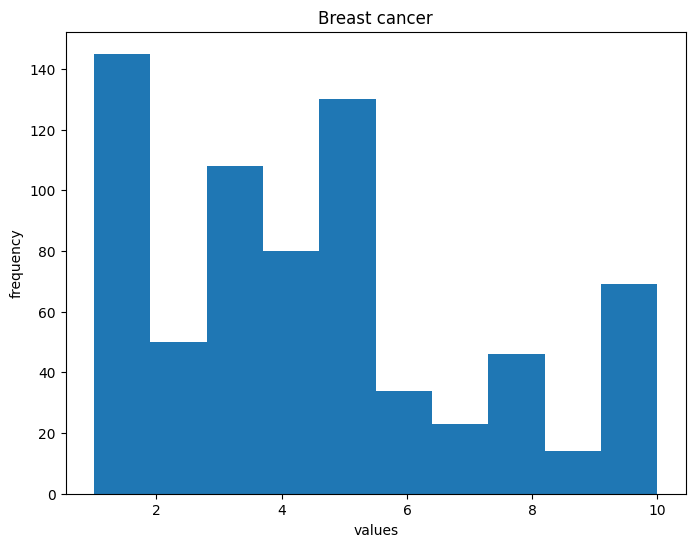

In [10]:
#visualize the dataset
plt.figure(figsize=(8,6))
plt.hist(data_set['Cl.thickness'],bins=10)
plt.title('Breast cancer')
plt.xlabel('values')
plt.ylabel('frequency')


In [11]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [12]:
#feature Scaling
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
print(x_train)
print(x_test)

[[ 0.65934756  1.29893022  2.21279217 ...  1.87584471 -0.29552173
  -0.33390732]
 [ 0.02694798 -0.4931694  -0.68596557 ... -0.5845874  -0.61546674
  -0.33390732]
 [ 0.52492521  1.29893022  2.21279217 ...  0.23555664  1.62414835
   3.28610862]
 ...
 [ 0.36515261 -0.13474948 -0.68596557 ... -0.99465942 -0.61546674
  -0.33390732]
 [ 0.60718008  0.22367045 -0.68596557 ... -0.5845874  -0.61546674
  -0.33390732]
 [-1.40293691 -1.21000925 -0.68596557 ... -0.99465942 -0.61546674
  -0.33390732]]
[[ 0.54627649 -0.13474948 -0.68596557 ... -0.99465942 -0.61546674
  -0.33390732]
 [-0.46141624 -0.13474948 -0.36388138 ... -0.5845874  -0.61546674
  -0.33390732]
 [ 0.07790942  0.58209037  0.92445539 ...  1.46577269  1.62414835
  -0.33390732]
 ...
 [ 0.68454734  0.22367045 -0.04179719 ... -0.99465942 -0.61546674
  -0.33390732]
 [ 0.36036844 -1.21000925 -0.68596557 ... -0.17451538 -0.61546674
  -0.33390732]
 [ 0.31577571 -0.13474948 -0.68596557 ... -0.17451538 -0.29552173
  -0.33390732]]


In [13]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [15]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[110   2]
 [  2  61]]


In [16]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9771428571428571

In [17]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Perform feature scaling using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Train a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(x_train_scaled, y_train)
# Predict on the test set
y_pred_logreg = logreg_model.predict(x_test_scaled)
# Compute the accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
# Compute the confusion matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
# Print the results
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_logreg)



Logistic Regression Accuracy: 0.9642857142857143
Logistic Regression Confusion Matrix:
[[94  1]
 [ 4 41]]
